In [27]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2,num_hiden3):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, num_hidden1)
        self.fc2 = nn.Linear(num_hidden1, num_hidden2)
        self.fc3 = nn.Linear(num_hidden2, num_hiden3)
        self.fc4 = nn.Linear(num_hiden3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        layer1 = self.fc1(x)
        act1 = self.sigmoid(layer1)
        layer2 = self.fc2(act1)
        act2 = self.sigmoid(layer2)
        layer3 = self.fc3(act2)
        act3 = self.sigmoid(layer3)
        layer4 = self.fc4(act3)
        out = self.sigmoid(layer4)
        return out

In [29]:
data = pd.read_csv('data.csv', header=None)
X = torch.tensor(data.drop(2, axis=1).values, dtype=torch.float)
y = torch.tensor(data[2].values, dtype=torch.float).view(-1,1)

torch.manual_seed(0)
loss = nn.BCELoss()
model = NeuralNetwork(X.shape[1], 10,10,10)

Epoch 0, loss 0.75
Epoch 1, loss 0.74
Epoch 2, loss 0.72
Epoch 3, loss 0.72
Epoch 4, loss 0.71
Epoch 5, loss 0.70
Epoch 6, loss 0.70
Epoch 7, loss 0.70
Epoch 8, loss 0.69
Epoch 9, loss 0.69
Epoch 10, loss 0.69
Epoch 11, loss 0.69
Epoch 12, loss 0.69
Epoch 13, loss 0.70
Epoch 14, loss 0.70
Epoch 15, loss 0.70
Epoch 16, loss 0.70
Epoch 17, loss 0.70
Epoch 18, loss 0.70
Epoch 19, loss 0.70
Epoch 20, loss 0.70
Epoch 21, loss 0.70
Epoch 22, loss 0.69
Epoch 23, loss 0.69
Epoch 24, loss 0.69
Epoch 25, loss 0.69
Epoch 26, loss 0.69
Epoch 27, loss 0.69
Epoch 28, loss 0.69
Epoch 29, loss 0.69
Epoch 30, loss 0.69
Epoch 31, loss 0.69
Epoch 32, loss 0.69
Epoch 33, loss 0.69
Epoch 34, loss 0.69
Epoch 35, loss 0.69
Epoch 36, loss 0.69
Epoch 37, loss 0.69
Epoch 38, loss 0.69
Epoch 39, loss 0.69
Epoch 40, loss 0.69
Epoch 41, loss 0.69
Epoch 42, loss 0.69
Epoch 43, loss 0.69
Epoch 44, loss 0.69
Epoch 45, loss 0.69
Epoch 46, loss 0.69
Epoch 47, loss 0.69
Epoch 48, loss 0.69
Epoch 49, loss 0.69
Epoch 50, 

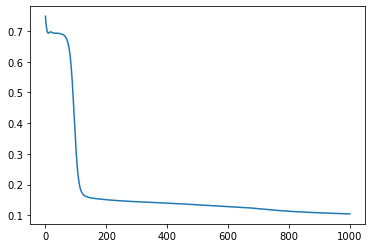

In [30]:
def torch_fit(X,y, model, loss, lr, num_epochs):
    optimizer = torch.optim.Adam(model.parameters(), lr)
    ls = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        pred = model(X)
        loss_value = loss(pred, y)
        ls.append(loss_value.detach().item())
        print(f'Epoch {epoch}, loss {loss_value.item():.2f}')
        loss_value.backward()
        optimizer.step()

    plt.plot(list(range(num_epochs)), ls)
    plt.show()
    return model

model = torch_fit(X,y, model=model, loss=loss, lr=0.01, num_epochs=1000)